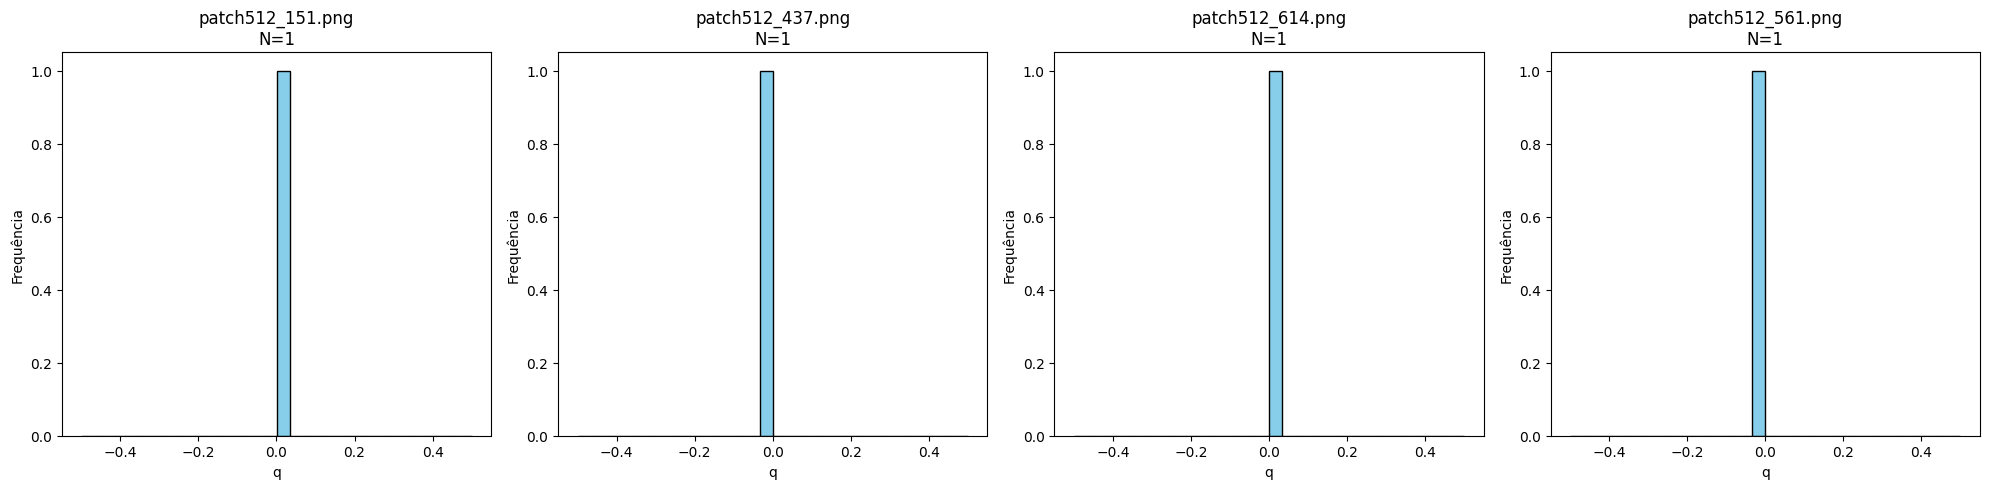

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

# Caminho do JSON com os contornos e valores de q
json_path = "new_dataset_contours_aggregate.json"

# Carrega os dados
with open(json_path, 'r') as f:
    contours_data = json.load(f)

# Lista de imagens disponíveis no JSON
image_keys = list(contours_data.keys())

# Seleciona aleatoriamente 4 imagens para plot
selected_images = random.sample(image_keys, 4)

# Cria subplots 1 linha, 4 colunas
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, image_name in enumerate(selected_images):
    q_values = [contour['q'] for contour in contours_data[image_name].values()]
    
    axes[i].hist(q_values, bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f"{image_name}\nN={len(q_values)}")
    axes[i].set_xlabel('q')
    axes[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()


In [2]:
# Lista para armazenar os resultados estatísticos
stats = []

for image_name in image_keys:
    q_values = [contour['q'] for contour in contours_data[image_name].values()]
    mean_q = np.mean(q_values)
    std_q = np.std(q_values)
    stats.append({
        "imagem": image_name,
        "n_contornos": len(q_values),
        "media_q": mean_q,
        "desvio_padrao_q": std_q,
        "min_q": np.min(q_values),
        "max_q": np.max(q_values)
    })

# Cria um DataFrame com os resultados
df_stats = pd.DataFrame(stats)

print(df_stats)

df_stats.to_excel("estatisticas_q.xlsx", index=False)


               imagem  n_contornos   media_q  desvio_padrao_q     min_q  \
0     patch512_00.png            1  0.000257              0.0  0.000257   
1     patch512_01.png            1  0.000300              0.0  0.000300   
2     patch512_02.png            1  0.000086              0.0  0.000086   
3     patch512_03.png            1  0.000126              0.0  0.000126   
4     patch512_04.png            1  0.000070              0.0  0.000070   
..                ...          ...       ...              ...       ...   
995  patch512_995.png            1  0.000210              0.0  0.000210   
996  patch512_996.png            1  0.000268              0.0  0.000268   
997  patch512_997.png            1  0.000122              0.0  0.000122   
998  patch512_998.png            1  0.000088              0.0  0.000088   
999  patch512_999.png            1  0.000151              0.0  0.000151   

        max_q  
0    0.000257  
1    0.000300  
2    0.000086  
3    0.000126  
4    0.000070  
.. 

N total de contornos: 1002
Média q: 0.000175
Desvio padrão q: 0.000121
Range q: de 0.000000 até 0.001025


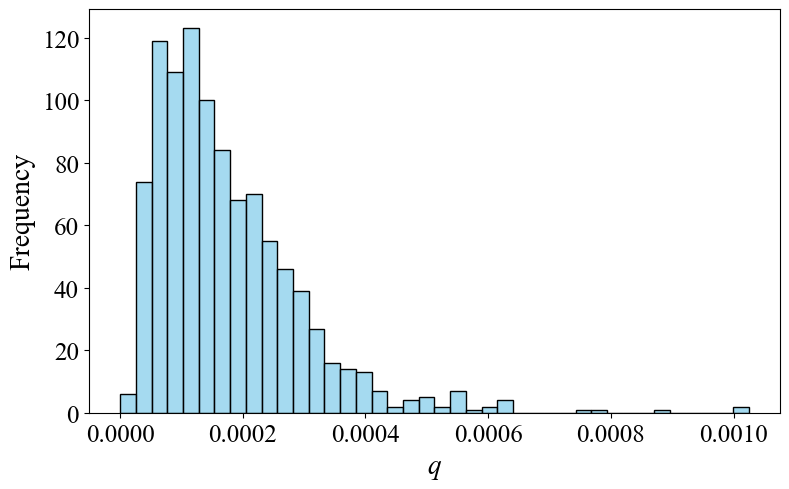

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que você já tenha contours_data e image_keys carregados
# Aqui vamos extrair todos os valores de q em uma única lista
q_all = []

for image_name in image_keys:
    q_vals = [contour['q'] for contour in contours_data[image_name].values()]
    q_all.extend(q_vals)

q_all = np.array(q_all)
q_all = q_all[q_all > 0]  # remove valores negativos ou zero, se existirem

# Estatísticas básicas
media_q = np.mean(q_all)
desvio_q = np.std(q_all)
min_q, max_q = np.min(q_all), np.max(q_all)
n_total = len(q_all)

print(f"N total de contornos: {n_total}")
print(f"Média q: {media_q:.6f}")
print(f"Desvio padrão q: {desvio_q:.6f}")
print(f"Range q: de {min_q:.6f} até {max_q:.6f}")

# Configurações globais de estilo
plt.rcParams.update({
    "font.family": "Times New Roman",  # Fonte
    "axes.labelsize": 20,              # Tamanho dos rótulos dos eixos
    "xtick.labelsize": 18,             # Tamanho dos valores do eixo x
    "ytick.labelsize": 18              # Tamanho dos valores do eixo y
})

# Geração da Figura 2
plt.figure(figsize=(8, 5))
sns.histplot(q_all, bins=40, kde=False, color='skyblue', edgecolor='black')
plt.xlabel("q", style='italic')
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("q_hist_all_dataset.png", format='png', dpi=600)
plt.show()


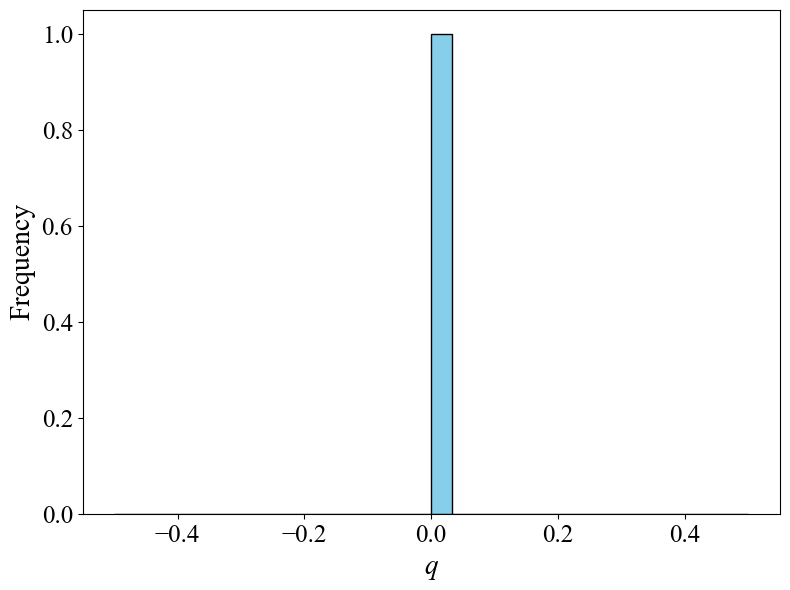

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Configurações globais de estilo
plt.rcParams.update({
    "font.family": "Times New Roman",  # Fonte
    "axes.labelsize": 20,              # Tamanho dos rótulos dos eixos
    "xtick.labelsize": 18,             # Tamanho dos valores do eixo x
    "ytick.labelsize": 18              # Tamanho dos valores do eixo y
})

# Caminho do JSON com os contornos e valores de q
json_path = "new_dataset_contours_aggregate.json"

# Carrega os dados
with open(json_path, 'r') as f:
    contours_data = json.load(f)

# Nome da imagem a ser usada
image_name = "patch512_00.png"

# Extrai os valores de q
q_values = [contour['q'] for contour in contours_data[image_name].values()]

# Cria a figura
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(q_values, bins=30, color='skyblue', edgecolor='black')
ax.set_xlabel('q', style='italic')
ax.set_ylabel('Frequency')

plt.savefig(f"fig_sample_hist.png", format='png', dpi=600)

plt.tight_layout()
plt.show()
